<a href="https://colab.research.google.com/github/RD191295/Tensorflow_Tutorials/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><b><font color=#27A7FA>Stock Market Prediction <font></b></h1>



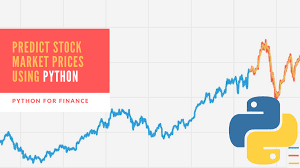

<h2><b><font color=#27A7FA>Import Libraries</font></b></h2>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<h2><b><font color=#27A7FA>Load Data</font></b></h2>

In [2]:
stock_data = pd.read_csv("ANGELONEEQN.csv")
stock_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ANGELBRKG,EQ,05-Oct-2020,306.00,275.00,296.70,257.00,274.25,275.80,280.43,8546238,2.396606e+09,257439,2078844,24.32
1,ANGELBRKG,EQ,06-Oct-2020,275.80,274.00,274.15,261.55,266.90,266.25,267.14,2721384,7.269848e+08,55430,957528,35.19
2,ANGELBRKG,EQ,07-Oct-2020,266.25,262.90,270.00,262.50,265.50,265.55,265.70,820136,2.179128e+08,21649,365739,44.59
3,ANGELBRKG,EQ,08-Oct-2020,265.55,267.05,273.35,264.55,270.40,270.85,268.35,738241,1.981077e+08,19664,251474,34.06
4,ANGELBRKG,EQ,09-Oct-2020,270.85,270.85,276.00,270.00,275.00,274.85,273.59,556877,1.523566e+08,14608,241307,43.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,ANGELONE,EQ,16-Sep-2022,1583.60,1575.00,1601.75,1530.50,1574.00,1567.50,1572.59,457788,7.199106e+08,21402,164247,35.88
486,ANGELONE,EQ,19-Sep-2022,1567.50,1563.00,1600.95,1532.10,1584.00,1572.10,1579.55,358025,5.655198e+08,17787,105018,29.33
487,ANGELONE,EQ,20-Sep-2022,1572.10,1600.00,1600.00,1556.00,1567.70,1566.70,1576.36,325169,5.125845e+08,15973,135559,41.69
488,ANGELONE,EQ,21-Sep-2022,1566.70,1574.40,1579.00,1515.55,1527.00,1530.10,1538.25,266969,4.106662e+08,17526,98060,36.73


<h2><b><font color=#27A7FA>Preprocessing Data</font></b></h2>

In [3]:
# Drop Symbol and Series column
stock_data = stock_data.drop(["Symbol","Series"],axis = 1)
stock_data

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,05-Oct-2020,306.00,275.00,296.70,257.00,274.25,275.80,280.43,8546238,2.396606e+09,257439,2078844,24.32
1,06-Oct-2020,275.80,274.00,274.15,261.55,266.90,266.25,267.14,2721384,7.269848e+08,55430,957528,35.19
2,07-Oct-2020,266.25,262.90,270.00,262.50,265.50,265.55,265.70,820136,2.179128e+08,21649,365739,44.59
3,08-Oct-2020,265.55,267.05,273.35,264.55,270.40,270.85,268.35,738241,1.981077e+08,19664,251474,34.06
4,09-Oct-2020,270.85,270.85,276.00,270.00,275.00,274.85,273.59,556877,1.523566e+08,14608,241307,43.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,16-Sep-2022,1583.60,1575.00,1601.75,1530.50,1574.00,1567.50,1572.59,457788,7.199106e+08,21402,164247,35.88
486,19-Sep-2022,1567.50,1563.00,1600.95,1532.10,1584.00,1572.10,1579.55,358025,5.655198e+08,17787,105018,29.33
487,20-Sep-2022,1572.10,1600.00,1600.00,1556.00,1567.70,1566.70,1576.36,325169,5.125845e+08,15973,135559,41.69
488,21-Sep-2022,1566.70,1574.40,1579.00,1515.55,1527.00,1530.10,1538.25,266969,4.106662e+08,17526,98060,36.73


In [4]:
# Print the dataframe head
stock_data.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,05-Oct-2020,306.00,275.00,296.70,257.00,274.25,275.80,280.43,8546238,2.396606e+09,257439,2078844,24.32
1,06-Oct-2020,275.80,274.00,274.15,261.55,266.90,266.25,267.14,2721384,7.269848e+08,55430,957528,35.19
2,07-Oct-2020,266.25,262.90,270.00,262.50,265.50,265.55,265.70,820136,2.179128e+08,21649,365739,44.59
3,08-Oct-2020,265.55,267.05,273.35,264.55,270.40,270.85,268.35,738241,1.981077e+08,19664,251474,34.06
4,09-Oct-2020,270.85,270.85,276.00,270.00,275.00,274.85,273.59,556877,1.523566e+08,14608,241307,43.33


In [5]:
# Print the dataframe tail
stock_data.tail()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
485,16-Sep-2022,1583.6,1575.0,1601.75,1530.50,1574.0,1567.5,1572.59,457788,7.199106e+08,21402,164247,35.88
486,19-Sep-2022,1567.5,1563.0,1600.95,1532.10,1584.0,1572.1,1579.55,358025,5.655198e+08,17787,105018,29.33
487,20-Sep-2022,1572.1,1600.0,1600.00,1556.00,1567.7,1566.7,1576.36,325169,5.125845e+08,15973,135559,41.69
488,21-Sep-2022,1566.7,1574.4,1579.00,1515.55,1527.0,1530.1,1538.25,266969,4.106662e+08,17526,98060,36.73
489,22-Sep-2022,1530.1,1537.8,1537.80,1495.10,1508.0,1507.0,1508.21,324775,4.898276e+08,19460,123918,38.16


In [6]:
stock_data = stock_data.drop(["Date"], axis = 1)

In [7]:
# check data type
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Prev Close              490 non-null    float64
 1   Open Price              490 non-null    float64
 2   High Price              490 non-null    float64
 3   Low Price               490 non-null    float64
 4   Last Price              490 non-null    float64
 5   Close Price             490 non-null    float64
 6   Average Price           490 non-null    float64
 7   Total Traded Quantity   490 non-null    int64  
 8   Turnover                490 non-null    float64
 9   No. of Trades           490 non-null    int64  
 10  Deliverable Qty         490 non-null    int64  
 11  % Dly Qt to Traded Qty  490 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 46.1 KB


In [8]:
# check mean median etc
stock_data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02,4.900000e+02,490.000000,4.900000e+02,490.000000
mean,984.083571,988.526327,1014.884898,962.673367,986.757959,986.534592,989.344061,7.034161e+05,7.584124e+08,27553.559184,2.129525e+05,38.207673
std,475.337853,477.693529,489.854328,463.809982,475.391091,474.930478,476.629399,9.591720e+05,1.189177e+09,30302.925167,2.169468e+05,13.730531
min,224.650000,222.200000,236.850000,222.200000,223.950000,224.650000,228.470000,2.349700e+04,7.273377e+06,968.000000,1.213600e+04,11.460000
25%,358.662500,359.000000,369.612500,353.537500,358.775000,358.937500,360.175000,2.559428e+05,1.670262e+08,11459.750000,9.864650e+04,28.022500
50%,1197.350000,1203.700000,1228.000000,1175.025000,1198.000000,1199.650000,1199.835000,4.225390e+05,4.671482e+08,20024.500000,1.540295e+05,37.035000
75%,1323.687500,1326.000000,1363.862500,1295.000000,1323.750000,1324.637500,1332.752500,7.395332e+05,8.684681e+08,32524.000000,2.495362e+05,47.247500
max,1949.200000,1935.000000,2022.000000,1882.000000,1959.000000,1949.200000,1968.840000,8.546238e+06,1.348982e+10,257439.000000,2.201298e+06,86.520000


<h2><b><font color=#27A7FA>Visualize Data</font></b></h2>

In [9]:
plt.rcParams['figure.figsize'] = (180, 120)

In [10]:
def price(x):
    """
    format the coords message box
    :param x: data to be formatted
    :return: formatted data
    """
    return '$%1.2f' % x

<h2><b><font color=#27A7FA>Normalize Data</font></b></h2>

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
stock_data_normalize = scaler.fit_transform(stock_data)
stock_data_normalize= pd.DataFrame(stock_data_normalize,columns =["Prev Close","Open Price",	"High Price",	"Low Price",	"Last Price",	"Close Price",	"Average Price",	"Total Traded Quantity",	"Turnover",	"No. of Trades",	"Deliverable Qty",	"% Dly Qt to Traded Qty"])
stock_data_normalize.head()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0.047172,0.030827,0.033527,0.020966,0.028991,0.029660,0.029856,1.000000,0.177217,1.000000,0.944064,0.171330
1,0.029660,0.030243,0.020895,0.023708,0.024754,0.024122,0.022219,0.316552,0.053381,0.212351,0.431851,0.316147
2,0.024122,0.023762,0.018570,0.024280,0.023947,0.023716,0.021392,0.093472,0.015623,0.080637,0.161524,0.441380
3,0.023716,0.026185,0.020446,0.025515,0.026772,0.026790,0.022915,0.083863,0.014154,0.072897,0.109329,0.301092
4,0.026790,0.028404,0.021931,0.028799,0.029423,0.029109,0.025926,0.062583,0.010761,0.053183,0.104684,0.424594


In [14]:
i_counter = 0
item = []
for i in range(len(stock_data_normalize)):
   item.append(i_counter)
   i_counter += 1
stock_data_normalize["Item"] = item

<h2><b><font color=#27A7FA>Visualize Normalize Data</font></b></h2>

In [15]:
fig, ax = plt.subplots()
ax.plot(stock_data_normalize['Item'], stock_data_normalize['Close Price'], '#0A7388',linewidth = 18)

ax.format_ydata = price
ax.set_title("Angle One Trading",size = 180)

# Add labels
plt.ylabel("Price INR",size = 180)
plt.xlabel("Trading Date",size = 180)
ax.tick_params(axis='both', which='major', labelsize=50)

plt.show()

In [17]:
stock_data_normalize.to_csv('ANGELONEEQN_PREPROCESSED.csv',index= False)

<h2><b><font color=#27A7FA>Model Building</font></b></h2>

In [47]:
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.metrics import mean_squared_error

In [24]:
stock_data_normalize.head()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,0.047172,0.030827,0.033527,0.020966,0.028991,0.029660,0.029856,1.000000,0.177217,1.000000,0.944064,0.171330
1,0.029660,0.030243,0.020895,0.023708,0.024754,0.024122,0.022219,0.316552,0.053381,0.212351,0.431851,0.316147
2,0.024122,0.023762,0.018570,0.024280,0.023947,0.023716,0.021392,0.093472,0.015623,0.080637,0.161524,0.441380
3,0.023716,0.026185,0.020446,0.025515,0.026772,0.026790,0.022915,0.083863,0.014154,0.072897,0.109329,0.301092
4,0.026790,0.028404,0.021931,0.028799,0.029423,0.029109,0.025926,0.062583,0.010761,0.053183,0.104684,0.424594


In [76]:
def train_test_split(data, prediction_time=1, test_data_size=45, unroll_length=50):
  """
  Split Data in train and test for model 
  :param data: whole dataset containing different features
  :param prediction_time: No of days
  :param test_data_size: size of test dataset
  :param unroll_length: how long a window should be used for train test split

  :return X_train: training set of features
  :return X_test: test set of feartures
  :return Y_train: training set of label
  :return Y_test: test set of label
  """
  # train data
  test_data_cut = test_data_size + unroll_length + 1 # 96

  X_train = data[0:-prediction_time - test_data_cut].values # 0 : -1 - 96 --- 0 : -97
  Y_train = data[prediction_time: -test_data_cut]["Close Price"].values # 1:-97
  
  # test data
  X_test = data[0-test_data_cut:-prediction_time].values
  Y_test = data[prediction_time-test_data_cut:]["Close Price"].values

  return X_train, Y_train, X_test, Y_test

In [77]:
X_train, Y_train, X_test, Y_test = train_test_split(stock_data_normalize, 5)

In [78]:
# Check size
print("Size of X_train is:",X_train.shape) 
print("Size of X_test is:",X_test.shape) 
print("Size of Y_train is:",Y_train.shape) 
print("Size of Y_test is:",Y_test.shape) 

Size of X_train is: (389, 12)
Size of X_test is: (91, 12)
Size of Y_train is: (389,)
Size of Y_test is: (91,)


In [79]:
def unroll(data, sequence_length=24):
   """
   use different windows for testing and training to stop from leak of information in the data
   :param data: data set to be used for unrolling
   :param sequence_length: window length
   :return: data sets with different window.
   """

   result = []

   for index in range(len(data) - sequence_length):
     result.append(data[index: index + sequence_length])
     
   return np.asarray(result)

In [80]:
unroll_length  = 50
X_train = unroll(X_train, unroll_length)
X_test = unroll(X_test, unroll_length)
y_train = Y_train[-X_train.shape[0]:]
y_test = Y_test[-X_test.shape[0]:]

In [90]:
# Check size
print("Size of X_train is:",X_train.shape) 
print("Size of X_test is:",X_test.shape) 
print("Size of Y_train is:",y_train.shape) 
print("Size of Y_test is:",y_test.shape) 

Size of X_train is: (339, 50, 12)
Size of X_test is: (41, 50, 12)
Size of Y_train is: (339,)
Size of Y_test is: (41,)


In [91]:
model = keras.Sequential()
model.add(keras.layers.LSTM(input_shape=(None, X_train.shape[-1]), units= unroll_length, return_sequences = True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(128, return_sequences = False))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(units = 1,activation = "relu"))

In [92]:
# Let's check Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 50)          12600     
                                                                 
 dropout_6 (Dropout)         (None, None, 50)          0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 104,377
Trainable params: 104,377
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Let us train model
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = root_mean_squared_error,
              metrics = ["mean_squared_error"]
              )

In [108]:
model.fit(X_train, y_train, epochs = 10 , validation_split= 0.1)

Epoch 1/10
10/10 [==============================] - 1s 91ms/step - loss: 0.0296 - mean_squared_error: 9.0648e-04 - val_loss: 0.2504 - val_mean_squared_error: 0.0627
Epoch 2/10
10/10 [==============================] - 1s 87ms/step - loss: 0.0340 - mean_squared_error: 0.0012 - val_loss: 0.2103 - val_mean_squared_error: 0.0442
Epoch 3/10
10/10 [==============================] - 1s 89ms/step - loss: 0.0321 - mean_squared_error: 0.0011 - val_loss: 0.2083 - val_mean_squared_error: 0.0434
Epoch 4/10
10/10 [==============================] - 1s 87ms/step - loss: 0.0319 - mean_squared_error: 0.0010 - val_loss: 0.1849 - val_mean_squared_error: 0.0343
Epoch 5/10
10/10 [==============================] - 1s 87ms/step - loss: 0.0317 - mean_squared_error: 0.0010 - val_loss: 0.2402 - val_mean_squared_error: 0.0577
Epoch 6/10
10/10 [==============================] - 1s 87ms/step - loss: 0.0288 - mean_squared_error: 8.6160e-04 - val_loss: 0.2266 - val_mean_squared_error: 0.0513
Epoch 7/10
10/10 [========

In [104]:
predictions = model.predict(X_test)

In [105]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
trainScore

[0.04320044070482254, 0.004677081946283579]

In [106]:
testScore = model.evaluate(X_test, y_test, verbose=0)
testScore

[0.06987714022397995, 0.0052605196833610535]

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Add labels
plt.ylabel("Price in INR")
plt.xlabel("Trading Days")

# Plot actual and predicted close values

plt.plot(y_test, '#00FF00', label='Adjusted Close')
plt.plot(predictions, '#0000FF', label='Predicted Close')

# Set title
ax.set_title("Actual Trading vs Prediction")
ax.legend(loc='upper left')
plt.show()